# Speech analysis and re-synthesis

This notebook demonstrates how to analyze speech and re-synthesis speech waveform from speech parameters using [pysptk](https://github.com/r9y9/pysptk) (and other useful speech/audio/music analysis packages). Synthesized audio examples are provided so that you are able to compare synthesis filters on your browser.

## Requirements

- pysptk: https://github.com/r9y9/pysptk
- scipy
- librosa: https://github.com/bmcfee/librosa
- seaborn: https://github.com/mwaskom/seaborn

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [28]:
import matplotlib
import seaborn
seaborn.set(style="dark")
rcParams['figure.figsize'] = (16, 5)

In [29]:
from IPython.display import Audio

In [30]:
import numpy as np
import librosa
import librosa.display
import pysptk
from scipy.io import wavfile

## Data Load

In [31]:
import copy
import fnmatch
import os
import random
import re

import pandas as pd
import json

def find_files(directory, pattern='*.wav'):
    '''Recursively finds all files matching the pattern.'''
    files = []
    for root, dirnames, filenames in os.walk(directory):
        for filename in fnmatch.filter(filenames, pattern):
            files.append(os.path.join(root, filename))
    return files

## Source parameter extraction

### Framing and windowing

In [32]:
frame_length = 1024
hop_length = 80

def windowing(x):
    # Note that almost all of pysptk functions assume input array is C-contiguous and np.float4 element type
    frames = librosa.util.frame(x, frame_length=frame_length, hop_length=hop_length).astype(np.float64).T

    # Windowing
    frames *= pysptk.blackman(frame_length)
    assert frames.shape[1] == frame_length 
    return frames

### F0 estimation

In [33]:
# F0 estimation
def f0_estimation(x):
    f0 = pysptk.swipe(x.astype(np.float64), fs=sr, hopsize=hop_length, min=60, max=240, otype="f0")
    plot(f0, linewidth=3, label="F0 trajectory estimated by SWIPE'")
    xlim(0, len(f0))
    legend(prop={'size': 16})
    return f0

## Mel-generalized cepstrum extraction

In [34]:
# Order of mel-cepstrum
order = 25
alpha = 0.41
stage = 5
gamma = -1.0 / stage

def mgcep(frames, order=order):
    mgc = pysptk.mgcep(frames, order, alpha, gamma, min_det=0)
    logH = pysptk.mgc2sp(mgc, alpha, gamma, frame_length).real
    librosa.display.specshow(logH.T, sr=sr, hop_length=hop_length, x_axis="time", y_axis="linear")
    colorbar()
    title("Spectral envelope estimate from mel-generalized cepstrm")
    return mgc

In [42]:
def generate_mgc(directory, sample_rate, lc_ext_name=".csv"):
    files = find_files(directory)
    print("files length: {}".format(len(files)))
    for filename in files:
        print filename
        audio, _ = librosa.load(filename, sr=sample_rate, mono=True)
        frames = windowing(audio)
        mgc = mgcep(frames)
        print mgc.shape
        df = pd.DataFrame(mgc)
        lc_filename = copy.deepcopy(filename)
        if lc_filename.endswith('.wav'):
            lc_filename = lc_filename[:-4] + lc_ext_name
        lc_filename = lc_filename.replace("wav48", "mgc")
        if not os.path.exists(os.path.dirname(lc_filename)):
            try:
                os.makedirs(os.path.dirname(lc_filename))
            except OSError as exc: # Guard against race condition
                if exc.errno != errno.EEXIST:
                    raise
        print lc_filename
        df.to_csv(lc_filename, sep=',', header=None, index=None) 

In [43]:
def generate_lc_map(directory):
    files = find_files(directory)
    print("files length: {}".format(len(files)))
    lookup = {}
    for filename in files:
        p_filename = filename.split(directory)[-1]
        print filename, p_filename
        # p_lc_filename = p_filename.replace("wav48", "mfcc").replace(".wav", ".csv")
        p_lc_filename = "../../mgc/p225"+p_filename.replace(".wav", ".csv")
        lookup[p_filename] = p_lc_filename
    with open(directory+"/mgc_p225.json", "w") as output:
        json.dump(lookup, output)

files length: 44257
../../VCTK-Corpus/wav48/p231/p231_374.wav
(415, 26)
../../VCTK-Corpus/mgc/p231/p231_374.csv
../../VCTK-Corpus/wav48/p231/p231_381.wav
(381, 26)
../../VCTK-Corpus/mgc/p231/p231_381.csv
../../VCTK-Corpus/wav48/p231/p231_251.wav
(492, 26)
../../VCTK-Corpus/mgc/p231/p231_251.csv
../../VCTK-Corpus/wav48/p231/p231_312.wav
(450, 26)
../../VCTK-Corpus/mgc/p231/p231_312.csv
../../VCTK-Corpus/wav48/p231/p231_102.wav
(424, 26)
../../VCTK-Corpus/mgc/p231/p231_102.csv
../../VCTK-Corpus/wav48/p231/p231_290.wav
(457, 26)
../../VCTK-Corpus/mgc/p231/p231_290.csv
../../VCTK-Corpus/wav48/p231/p231_002.wav
(637, 26)
../../VCTK-Corpus/mgc/p231/p231_002.csv
../../VCTK-Corpus/wav48/p231/p231_347.wav
(398, 26)
../../VCTK-Corpus/mgc/p231/p231_347.csv
../../VCTK-Corpus/wav48/p231/p231_023.wav
(1858, 26)
../../VCTK-Corpus/mgc/p231/p231_023.csv
../../VCTK-Corpus/wav48/p231/p231_471.wav
(440, 26)
../../VCTK-Corpus/mgc/p231/p231_471.csv
../../VCTK-Corpus/wav48/p231/p231_390.wav
(406, 26)
../../V

(517, 26)
../../VCTK-Corpus/mgc/p231/p231_108.csv
../../VCTK-Corpus/wav48/p231/p231_473.wav
(483, 26)
../../VCTK-Corpus/mgc/p231/p231_473.csv
../../VCTK-Corpus/wav48/p231/p231_373.wav
(662, 26)
../../VCTK-Corpus/mgc/p231/p231_373.csv
../../VCTK-Corpus/wav48/p231/p231_199.wav
(688, 26)
../../VCTK-Corpus/mgc/p231/p231_199.csv
../../VCTK-Corpus/wav48/p231/p231_294.wav
(483, 26)
../../VCTK-Corpus/mgc/p231/p231_294.csv
../../VCTK-Corpus/wav48/p231/p231_041.wav
(526, 26)
../../VCTK-Corpus/mgc/p231/p231_041.csv
../../VCTK-Corpus/wav48/p231/p231_071.wav
(449, 26)
../../VCTK-Corpus/mgc/p231/p231_071.csv
../../VCTK-Corpus/wav48/p231/p231_351.wav
(467, 26)
../../VCTK-Corpus/mgc/p231/p231_351.csv
../../VCTK-Corpus/wav48/p231/p231_344.wav
(492, 26)
../../VCTK-Corpus/mgc/p231/p231_344.csv
../../VCTK-Corpus/wav48/p231/p231_419.wav
(423, 26)
../../VCTK-Corpus/mgc/p231/p231_419.csv
../../VCTK-Corpus/wav48/p231/p231_231.wav
(517, 26)
../../VCTK-Corpus/mgc/p231/p231_231.csv
../../VCTK-Corpus/wav48/p231/p

ValueError: left cannot be >= right

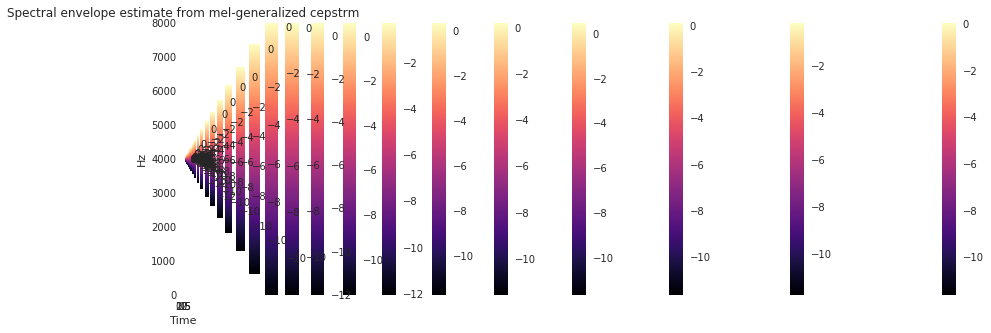

In [44]:
generate_mgc("../../VCTK-Corpus", 16000, lc_ext_name=".csv")